In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [4]:
url = "https://raw.githubusercontent.com/Gabriel-Chaves0/Analise_data_set/main/Cidades_brasil.csv"

In [5]:
data_set = pd.read_csv(url, encoding='utf-8', skiprows=3)
data_set

,Município,Estado,IBGE_1-4,IDHM,IDHM_Renda,IDHM_Educacao,GDP_CAPITA,COMP_P,Valor Vazio
0,Mojuí Dos Campos,PA,NaN,NaN,NaN,NaN,8831.56,41.0,1
1,Paraíso Das Águas,MS,NaN,NaN,NaN,NaN,92163.92,3.0,1
2,Balneário Rincão,SC,NaN,NaN,NaN,NaN,17788.63,3.0,1
3,Pescaria Brava,SC,NaN,NaN,NaN,NaN,8341.33,14.0,1
4,Santa Terezinha,BA,126.0,NaN,NaN,NaN,6796.16,12.0,1
...,...,...,...,...,...,...,...,...,...
5571,Floresta Do Piauí,PI,48.0,0.540,0.530,0.391,7638.73,1.0,0
5572,João Dias,RN,58.0,0.530,0.495,0.390,6994.26,1.0,0
5573,Araguainha,MT,55.0,0.701,0.650,0.627,19395.16,1.0,0
5574,Lagoinha Do Piauí,PI,100.0,0.597,0.561,0.488,6508.49,0.0,0


In [17]:
regioes_brasil = {
    'AC': 'Norte', 'AL': 'Nordeste', 'AP': 'Norte', 'AM': 'Norte', 'BA': 'Nordeste', 'CE': 'Nordeste',
    'DF': 'Centro-Oeste', 'ES': 'Sudeste', 'GO': 'Centro-Oeste', 'MA': 'Nordeste', 'MT': 'Centro-Oeste',
    'MS': 'Centro-Oeste', 'MG': 'Sudeste', 'PA': 'Norte', 'PB': 'Nordeste', 'PR': 'Sul', 'PE': 'Nordeste',
    'PI': 'Nordeste', 'RJ': 'Sudeste', 'RN': 'Nordeste', 'RS': 'Sul', 'RO': 'Norte', 'RR': 'Norte',
    'SC': 'Sul', 'SP': 'Sudeste', 'SE': 'Nordeste', 'TO': 'Norte'
}

## Tratamento de dados

In [6]:
data_set.isnull().sum()

,0
Município,0
Estado,0
IBGE_1-4,8
IDHM,8
IDHM_Renda,8
IDHM_Educacao,8
GDP_CAPITA,3
COMP_P,3
Valor Vazio,0


In [20]:
idhm_mean_by_state = data_set.groupby('Estado')['IDHM'].mean().reset_index()
idhm_education_mean_by_state = data_set.groupby('Estado')['IDHM_Educacao'].mean().reset_index()
idhm_mean_by_state

,Estado,IDHM
0,AC,0.586409
1,AL,0.563539
2,AM,0.565226
3,AP,0.643125
4,BA,0.594036
5,CE,0.616712
6,DF,0.820000
7,ES,0.692000
8,GO,0.694992
9,MA,0.576171


In [26]:
media_educ = idhm_education_mean_by_state.set_index('Estado')['IDHM_Educacao'].to_dict()
media = idhm_mean_by_state.set_index('Estado')['IDHM'].to_dict()

data_set['IDHM_Educacao'] = data_set['IDHM_Educacao'].fillna(data_set['Estado'].map(media_educ))
data_set['IDHM'] = data_set['IDHM'].fillna(data_set['Estado'].map(media))

data_set.head(10)

,Município,Estado,IBGE_1-4,IDHM,IDHM_Renda,IDHM_Educacao,GDP_CAPITA,COMP_P,Valor Vazio,Classificacao_ONU,Regiao,IDHM_educacao
0,Mojuí Dos Campos,PA,NaN,0.581657,NaN,0.448664,8831.56,41.0,1,Médio,Norte,0.448664
1,Paraíso Das Águas,MS,NaN,0.679538,NaN,0.557410,92163.92,3.0,1,Médio,Centro-Oeste,0.557410
2,Balneário Rincão,SC,NaN,0.731601,NaN,0.636522,17788.63,3.0,1,Alto,Sul,0.636522
3,Pescaria Brava,SC,NaN,0.731601,NaN,0.636522,8341.33,14.0,1,Alto,Sul,0.636522
4,Santa Terezinha,BA,126.0,0.594036,NaN,0.481887,6796.16,12.0,1,Médio,Nordeste,0.481887
5,Pinto Bandeira,RS,NaN,0.713558,NaN,0.600714,18184.45,1.0,1,Alto,Sul,0.600714
6,Lagoa Dos Patos,RS,NaN,0.713558,NaN,0.600714,NaN,NaN,1,Alto,Sul,0.600714
7,Santa Teresinha,BA,NaN,0.590000,0.549,0.459000,NaN,NaN,1,Médio,Nordeste,0.459000
8,São Caetano,PE,NaN,0.596276,NaN,0.490557,NaN,NaN,1,Médio,Nordeste,0.490557
9,São Paulo,SP,514794.0,0.805000,0.843,0.725000,57071.43,16030.0,0,Muito Alto,Sudeste,0.725000


## Questão A



In [9]:
primeiro_quartil_idhm = data_set['IDHM'].quantile(0.25)
primeiro_quartil_idhm

0.599

## Questão B

In [10]:
municipios_quartil_inferior = data_set[data_set['IDHM'] < primeiro_quartil_idhm]
contagem_municipios_por_estado = municipios_quartil_inferior['Estado'].value_counts()
contagem_municipios_por_estado

,count
Estado,
BA,254
PI,180
MA,154
PB,150
PE,105
PA,96
AL,88
MG,71
RN,70


In [12]:
municipios_totais = contagem_municipios_por_estado.sum()
top_estados = contagem_municipios_por_estado[contagem_municipios_por_estado.cumsum() <= 0.8 * municipios_totais]

Ao aplicar o princípio de Pareto (80/20) à distribuição de municípios com IDHM abaixo do primeiro quartil,
observamos que a maior concentração de municípios está localizada em alguns estados específicos, como Bahia (BA),
Piauí (PI) e Maranhão (MA). Esses estados apresentam uma grande parte dos municípios com menor desenvolvimento humano,
representando mais de 80% dos municípios abaixo desse quartil. Isso demonstra uma forte concentração de municípios
com baixos índices de desenvolvimento em poucas regiões do Brasil,
sugerindo um foco regional para políticas públicas voltadas à melhoria do IDHM.

<ipython-input-13-54f58d1a4f7c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_estados.index, y=top_estados.values, palette='Blues_d')


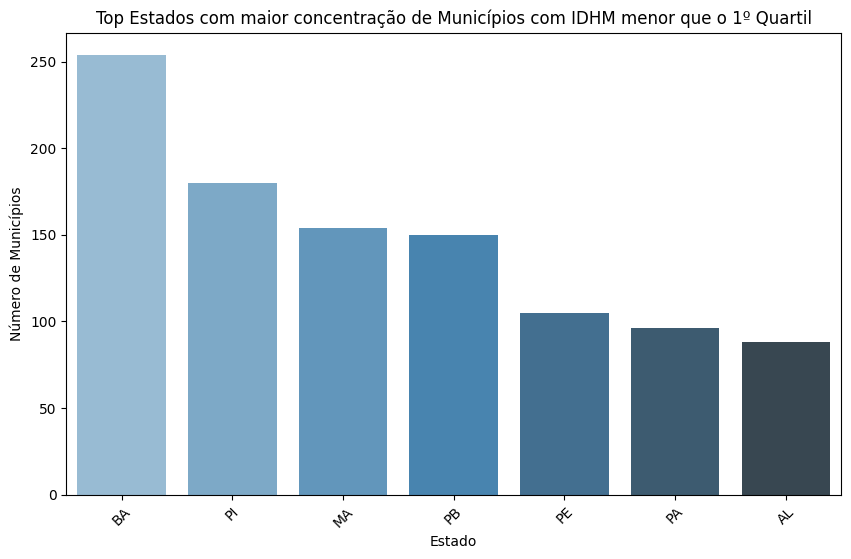

<ipython-input-13-54f58d1a4f7c>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=contagem_municipios_por_estado.index, y=contagem_municipios_por_estado.values, palette='Oranges_r')


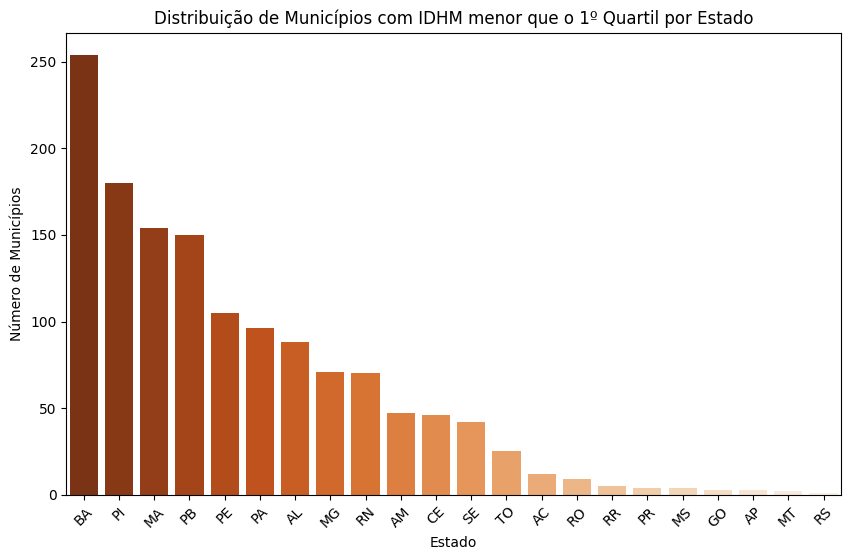

In [13]:
plt.figure(figsize=(10,6))
sns.barplot(x=top_estados.index, y=top_estados.values, palette='Blues_d')
plt.title('Top Estados com maior concentração de Municípios com IDHM menor que o 1º Quartil')
plt.xlabel('Estado')
plt.ylabel('Número de Municípios')
plt.xticks(rotation=45)
plt.show()

# Visualização do gráfico de todos os estados
plt.figure(figsize=(10,6))
sns.barplot(x=contagem_municipios_por_estado.index, y=contagem_municipios_por_estado.values, palette='Oranges_r')
plt.title('Distribuição de Municípios com IDHM menor que o 1º Quartil por Estado')
plt.xlabel('Estado')
plt.ylabel('Número de Municípios')
plt.xticks(rotation=45)
plt.show()

## Questão C

In [19]:
def classificar_idhm(idhm):
    if idhm < 0.550:
        return 'Baixo'
    elif 0.550 <= idhm < 0.700:
        return 'Médio'
    elif 0.700 <= idhm < 0.800:
        return 'Alto'
    else:
        return 'Muito Alto'

Média do IDHM no Brasil: 0.659

Média do IDHM por Estado:
Estado
AC    0.586409
AL    0.563539
AM    0.565226
AP    0.643125
BA    0.594036
CE    0.616712
DF    0.820000
ES    0.692000
GO    0.694992
MA    0.576171
MG    0.667875
MS    0.679538
MT    0.684071
PA    0.581657
PB    0.587771
PE    0.596276
PI    0.571196
PR    0.701962
RJ    0.708677
RN    0.610904
RO    0.644135
RR    0.610067
RS    0.713558
SC    0.731601
SE    0.597107
SP    0.739666
TO    0.639885
Name: IDHM, dtype: float64


<ipython-input-16-46e39de0be41>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=media_idhm_por_estado.index, y=media_idhm_por_estado.values, palette='coolwarm')


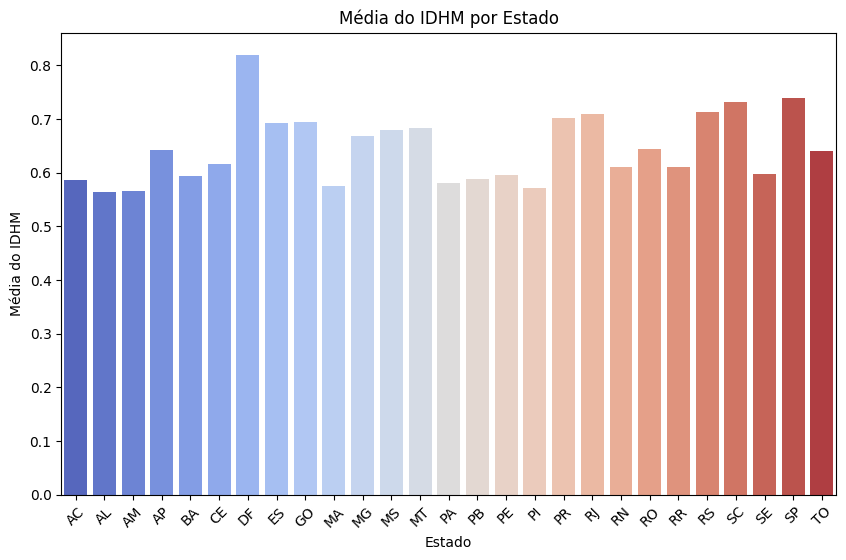

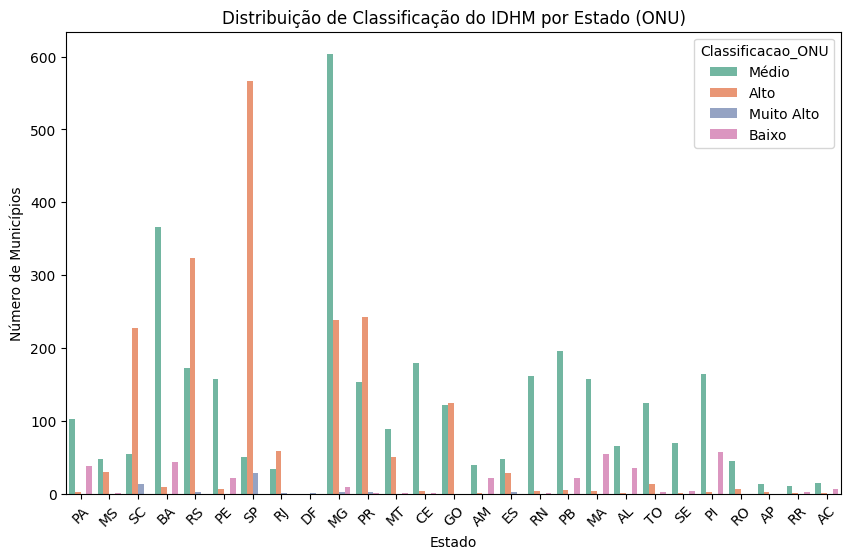

In [16]:
media_idhm_brasil = data_set['IDHM'].mean()
media_idhm_por_estado = data_set.groupby('Estado')['IDHM'].mean()

data_set['Classificacao_ONU'] = data_set['IDHM'].apply(classificar_idhm)

print(f"Média do IDHM no Brasil: {media_idhm_brasil:.3f}")

print("\nMédia do IDHM por Estado:")
print(media_idhm_por_estado)

plt.figure(figsize=(10,6))
sns.barplot(x=media_idhm_por_estado.index, y=media_idhm_por_estado.values, palette='coolwarm')
plt.title('Média do IDHM por Estado')
plt.xlabel('Estado')
plt.ylabel('Média do IDHM')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10,6))
sns.countplot(x='Estado', hue='Classificacao_ONU', data=data_set, palette='Set2')
plt.title('Distribuição de Classificação do IDHM por Estado (ONU)')
plt.xlabel('Estado')
plt.ylabel('Número de Municípios')
plt.xticks(rotation=45)
plt.show()


Média do IDHM por Região:
Regiao
Centro-Oeste    0.689348
Nordeste        0.590771
Norte           0.607964
Sudeste         0.699044
Sul             0.714132
Name: IDHM, dtype: float64


<ipython-input-18-7c5349691216>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=media_idhm_por_regiao.index, y=media_idhm_por_regiao.values, palette='viridis')


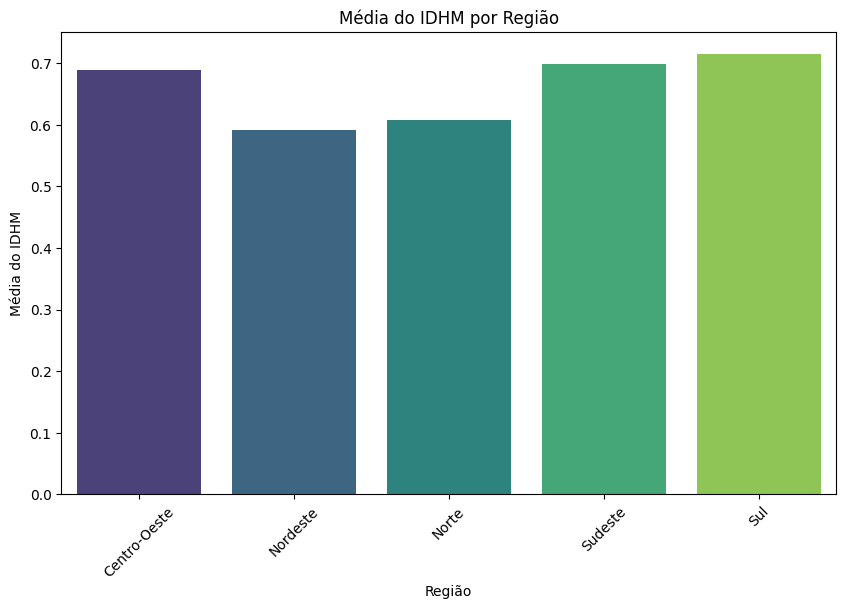

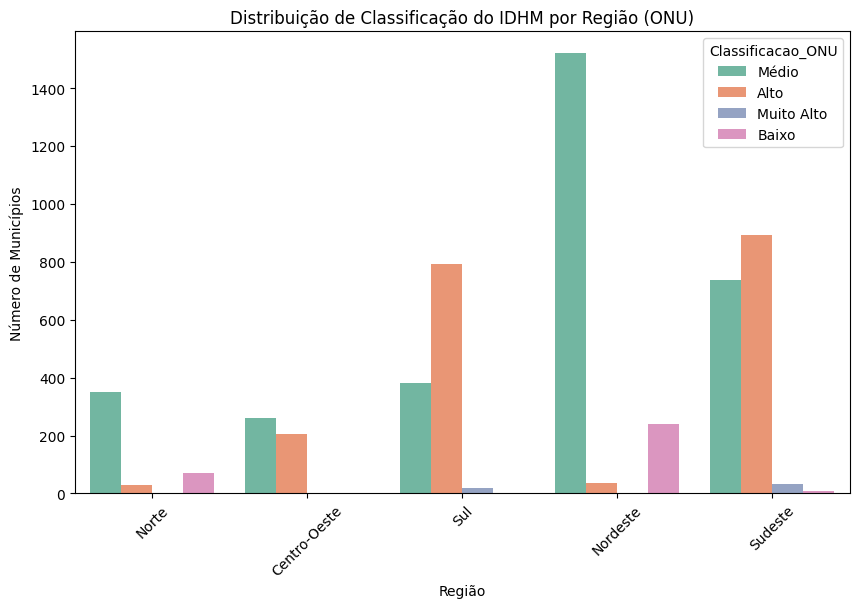

In [18]:
data_set['Regiao'] = data_set['Estado'].map(regioes_brasil)
media_idhm_por_regiao = data_set.groupby('Regiao')['IDHM'].mean()

print("\nMédia do IDHM por Região:")
print(media_idhm_por_regiao)

plt.figure(figsize=(10,6))
sns.barplot(x=media_idhm_por_regiao.index, y=media_idhm_por_regiao.values, palette='viridis')
plt.title('Média do IDHM por Região')
plt.xlabel('Região')
plt.ylabel('Média do IDHM')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10,6))
sns.countplot(x='Regiao', hue='Classificacao_ONU', data=data_set, palette='Set2')
plt.title('Distribuição de Classificação do IDHM por Região (ONU)')
plt.xlabel('Região')
plt.ylabel('Número de Municípios')
plt.xticks(rotation=45)
plt.show()

## Questão D

<ipython-input-25-e27c983fe7ed>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Regiao', y='IDHM_Educacao', data=data_set, palette='Set2')


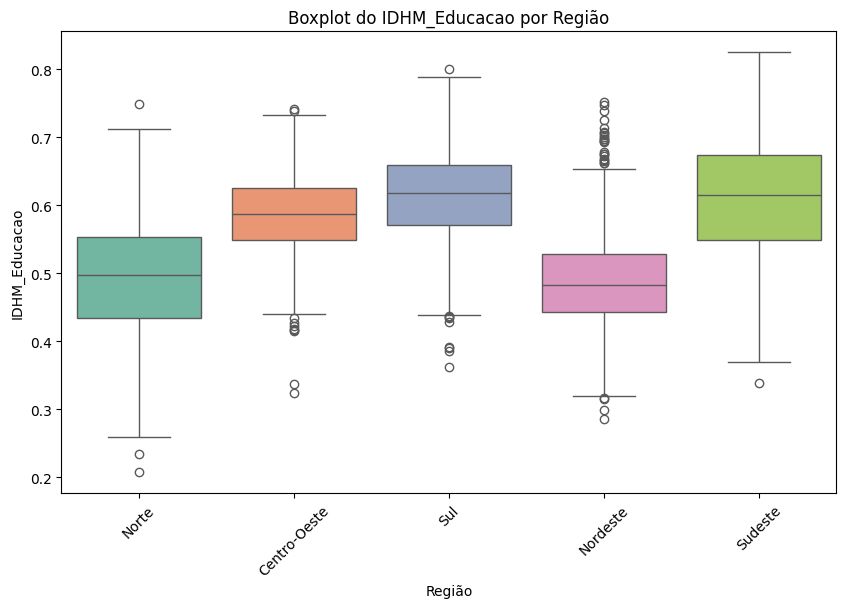

In [25]:
data_set['Regiao'] = data_set['Estado'].map(regioes_brasil)

plt.figure(figsize=(10,6))
sns.boxplot(x='Regiao', y='IDHM_Educacao', data=data_set, palette='Set2')
plt.title('Boxplot do IDHM_Educacao por Região')
plt.xlabel('Região')
plt.ylabel('IDHM_Educacao')
plt.xticks(rotation=45)
plt.show()

- Assim como no gráfico anterior que mostra a média do IDHM por região, o boxplot revela que regiões como o Nordeste e Norte têm uma distribuição de IDHM_Educacao mais baixa em comparação com o Centro-Oeste e Sul, que tendem a ter valores mais altos.

- O boxplot revela mais sobre a variabilidade dentro de cada região. Por exemplo, enquanto a média de IDHM_Educacao pode ser parecida em algumas regiões, o boxplot mostra se há uma maior disparidade em termos de acesso à educação dentro de uma mesma região. Isso pode indicar que algumas regiões têm municípios com educação de alta qualidade, mas também com uma significativa quantidade de municípios com baixos índices educacionais.

## Questão E

In [28]:
media_idhm_educacao_por_regiao = data_set.groupby('Regiao')['IDHM_Educacao'].mean()

regiao_menor_media_educacao = media_idhm_educacao_por_regiao.idxmin()
print(f"A região com a menor média de IDHM_Educacao é: {regiao_menor_media_educacao}")

municipios_regiao_menor_media = data_set[data_set['Regiao'] == regiao_menor_media_educacao]

terceiro_quartil_ibge_1_4 = data_set['IBGE_1-4'].quantile(0.75)
print(f"O 3º quartil nacional para IBGE_1-4 é: {terceiro_quartil_ibge_1_4}")

municipios_acima_terceiro_quartil = municipios_regiao_menor_media[municipios_regiao_menor_media['IBGE_1-4'] > terceiro_quartil_ibge_1_4]

print("\nMunicípios acima do 3º quartil nacional para IBGE_1-4:")
print(municipios_acima_terceiro_quartil[['Município', 'Estado', 'IBGE_1-4', 'IDHM_Educacao']])

A região com a menor média de IDHM_Educacao é: Nordeste
O 3º quartil nacional para IBGE_1-4 é: 952.0

Municípios acima do 3º quartil nacional para IBGE_1-4:
       Município Estado  IBGE_1-4  IDHM_Educacao
16        Recife     PE   54720.0          0.698
19      Salvador     BA   91470.0          0.679
24     Fortaleza     CE  129766.0          0.695
45     Barreiras     BA    8402.0          0.668
58         Natal     RN   41558.0          0.694
...          ...    ...       ...            ...
3709   Araçoiaba     PE    1158.0          0.498
3810   Pirapemas     MA     970.0          0.514
5196   Tamandaré     PE    1134.0          0.479
5215    Irauçuba     CE    1092.0          0.557
5221  Turilândia     MA     987.0          0.402

[456 rows x 4 columns]


Essa analise indica áreas (principalmentre regão Nordeste) onde é necessário um foco especial em políticas de educação infantil, dada a importância da faixa etária para o desenvolvimento futuro.

## Questão F

O 1º quartil nacional para COMP_P (empresas de educação) é: 2.0

Os 10 primeiros municípios no 1º quartil nacional para COMP_P (menos empresas de educação) com sua respectiva região:
             Município Estado    Regiao  COMP_P  IDHM_Educacao
5       Pinto Bandeira     RS       Sul     1.0       0.600714
640           Condeúba     BA  Nordeste     0.0       0.447000
654            Parambu     CE  Nordeste     2.0       0.460000
655  Cristais Paulista     SP   Sudeste     2.0       0.682000
686          Jaborandi     SP   Sudeste     1.0       0.627000
761       Rio Do Pires     BA  Nordeste     0.0       0.481000
780           Aiuruoca     MG   Sudeste     0.0       0.505000
804       Souto Soares     BA  Nordeste     1.0       0.530000
815   Gabriel Monteiro     SP   Sudeste     2.0       0.762000
871             Munhoz     MG   Sudeste     1.0       0.520000


<ipython-input-34-e0e25aba6d5f>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Regiao', data=municipios_primeiro_quartil, palette='Set3')


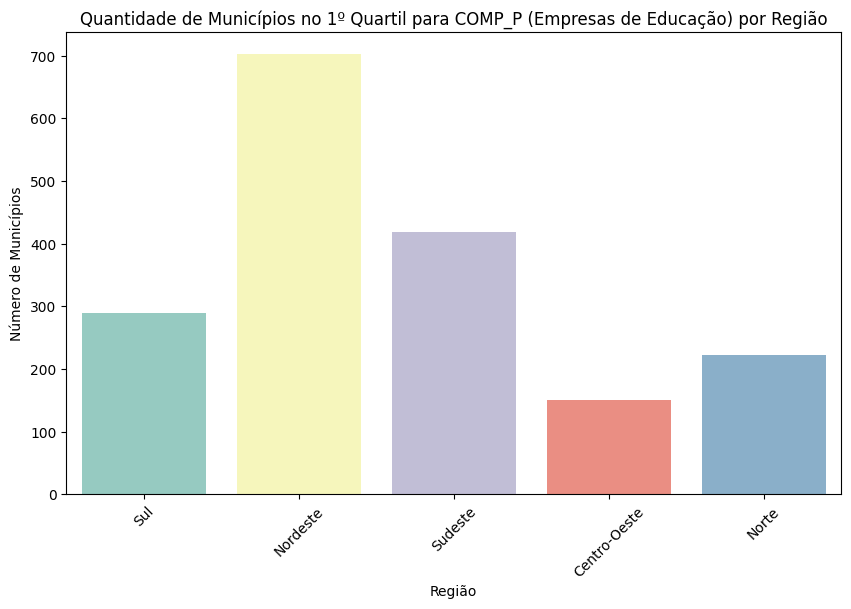

In [34]:
primeiro_quartil_comp_p = data_set['COMP_P'].quantile(0.25)
print(f"O 1º quartil nacional para COMP_P (empresas de educação) é: {primeiro_quartil_comp_p}")

municipios_primeiro_quartil = data_set[data_set['COMP_P'] <= primeiro_quartil_comp_p]

print("\nOs 10 primeiros municípios no 1º quartil nacional para COMP_P (menos empresas de educação) com sua respectiva região:")
print(municipios_primeiro_quartil[['Município', 'Estado', 'Regiao', 'COMP_P', 'IDHM_Educacao']].head(10))

plt.figure(figsize=(10,6))
sns.countplot(x='Regiao', data=municipios_primeiro_quartil, palette='Set3')
plt.title('Quantidade de Municípios no 1º Quartil para COMP_P (Empresas de Educação) por Região')
plt.xlabel('Região')
plt.ylabel('Número de Municípios')
plt.xticks(rotation=45)
plt.show()

## Questão G

A ordem de priorização para investimento em educação, com base nas análises, é a seguinte:

- Nordeste e Norte: Prioridade máxima, pois apresentam baixos índices de IDHM_Educacao e poucas empresas educacionais (COMP_P). Estados como Bahia (BA), Piauí (PI), Maranhão (MA) e Pará (PA) devem ser o foco.

- Municípios com alta concentração de crianças (1-4 anos): Investir em cidades dessas regiões com grande número de crianças e baixo IDHM_Educacao, principalmente no Nordeste e Norte.

- Municípios com grandes disparidades internas: Áreas com grande variabilidade no IDHM_Educacao, como no Centro-Oeste e Sudeste, precisam de equilíbrio nos investimentos.

- Municípios com baixo desenvolvimento geral: Cidades com baixo IDHM geral nas mesmas regiões devem receber atenção integrada (educação e qualidade de vida).